In [2]:
!pip install langdetect
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=d34deec515ba981098320abb004c8f32dc81d9e5a5b294a69ce0fa16a410cb47
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 30.7 MB/s eta 0:00:00


In [12]:
import pandas as pd

# Appstore Netflix Reviews
appstore_netflix_reviews_es = pd.read_csv('appstore-netflix-reviews-es.csv')
appstore_netflix_reviews_gb = pd.read_csv('appstore-netflix-reviews-gb.csv')
appstore_netflix_reviews_us = pd.read_csv('appstore-netflix-reviews-us.csv')
appstore_netflix_reviews_ca = pd.read_csv('appstore-netflix-reviews-ca.csv')

netflix_ca = pd.read_csv("netflixreview_CA.csv")
netflix_es = pd.read_csv("netflixreview_ES.csv")
netflix_gb = pd.read_csv("netflixreview_GB.csv")
netflix_us = pd.read_csv("netflixreview_US.csv")


In [ ]:
all_reviews = pd.concat([
    netflix_ca, netflix_es, netflix_gb, netflix_us
], ignore_index=True)

# 4. 결과 확인
print(f"총 리뷰 수: {len(all_reviews)}")
all_reviews.info()

총 리뷰 수: 158169
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158169 entries, 0 to 158168
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              158169 non-null  object
 1   userName              158169 non-null  object
 2   content               158169 non-null  object
 3   score                 158169 non-null  int64 
 4   thumbsUpCount         158169 non-null  int64 
 5   reviewCreatedVersion  134556 non-null  object
 6   at                    158169 non-null  object
 7   appVersion            134556 non-null  object
dtypes: int64(2), object(6)
memory usage: 9.7+ MB


In [ ]:
# content와 score만 남기기
all_reviews = all_reviews[['content', 'score']]


In [ ]:
all_reviews

,content,score
0,Problems with brightness control. Turns bright...,2
1,i started a subscription and it only lasted fo...,1
2,21 scrolls up until i can continue what i was ...,4
3,netflix is a great app byt im not sure if ther...,4
4,"Haven't used Netflix in a long time, but they'...",5
...,...,...
158164,"Haven't used Netflix in a long time, but they'...",5
158165,netflix is a great app byt im not sure if ther...,4
158166,21 scrolls up until i can continue what i was ...,4
158167,i started a subscription and it only lasted fo...,1


In [ ]:
# appstore 파일들 통합
appstore_reviews = pd.concat([
    appstore_netflix_reviews_es, appstore_netflix_reviews_gb, appstore_netflix_reviews_us, appstore_netflix_reviews_ca
], ignore_index=True)
# 4. 결과 확인
print(f"총 리뷰 수: {len(appstore_reviews)}")
appstore_reviews.info()

총 리뷰 수: 2000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     2000 non-null   int64 
 1   title         2000 non-null   object
 2   author        2000 non-null   object
 3   author_url    2000 non-null   object
 4   version       2000 non-null   object
 5   rating        2000 non-null   int64 
 6   review        2000 non-null   object
 7   vote_count    2000 non-null   int64 
 8   updated       2000 non-null   object
 9   content_type  2000 non-null   object
dtypes: int64(3), object(7)
memory usage: 156.4+ KB


In [ ]:
appstore_reviews = appstore_reviews[['review', 'rating']]

In [ ]:
# 칼럼이름 변경 review:content, rating:score
appstore_reviews.rename(columns={'review': 'content', 'rating': 'score'}, inplace=True)

In [ ]:
# appstore_reviews와 all_reviews concat으로 붙이기
reviews = pd.concat([
    appstore_reviews, all_reviews
], ignore_index=True)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160169 entries, 0 to 160168
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  160169 non-null  object
 1   score    160169 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import pandas as pd

# 1. 한국어로 판단된 content와 그에 해당하는 score를 저장할 리스트
korean_contents = []
korean_scores = []

# 2. content, score를 함께 순회
for text, score in zip(reviews['content'], reviews['score']):
    try:
        lang = detect(text)
        if lang == 'ko':
            korean_contents.append(text)
            korean_scores.append(score)
    except LangDetectException:
        continue  # 너무 짧거나 오류 나는 문장은 건너뜀

# 3. 결과 DataFrame 생성
korean_df = pd.DataFrame({
    'content': korean_contents,
    'score': korean_scores
})

# 4. 결과 확인
print(korean_df.head())

Empty DataFrame
Columns: [content, score]
Index: []


In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import pandas as pd

# 1. 영어로 판단된 content와 그에 해당하는 score를 저장할 리스트
us_english_contents = []
us_english_scores = []

# 2. content, score를 함께 순회
for text, score in zip(reviews['content'], reviews['score']):
    try:
        lang = detect(text)
        if lang == 'en':
            us_english_contents.append(text)
            us_english_scores.append(score)
    except LangDetectException:
        continue  # 너무 짧거나 오류 나는 문장은 건너뜀

# 3. 결과 DataFrame 생성
us_english_df = pd.DataFrame({
    'content': us_english_contents,
    'score': us_english_scores
})

# 4. 확인
print(us_english_df.head())

                                             content  score
0                       For everyone who love movies      5
1  Put again the story mode of Minecraft please I...      4
2  Thanks for bringing back Pokémon XY to your pl...      5
3  Me encanta El método Kominsky, The Good Place,...      5
4  Horizontal bar on TV sucks, Netflix had the be...      1


In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# 미국식 영어만 필터링된 content 리스트를 담기 위한 리스트
us_english_reviews = []

# 1. content 열 순회하면서 언어 감지
for text in reviews['content']:
    try:
        lang = detect(text)
        if lang == 'en':
            us_english_reviews.append(text)
    except LangDetectException:
        continue  # 너무 짧거나 분석 불가능한 문장은 건너뜀

# 2. 결과를 DataFrame으로 저장
us_english_df = pd.DataFrame({'content': us_english_reviews})

# 확인
print(us_english_df.head())


                                             content
0                       For everyone who love movies
1  Put again the story mode of Minecraft please I...
2  Thanks for bringing back Pokémon XY to your pl...
3  Me encanta El método Kominsky, The Good Place,...
4  Horizontal bar on TV sucks, Netflix had the be...


- 기본 버전 데이터 로드

In [6]:
import pandas as pd
us_english_df=pd.read_csv('us_english_reviews.csv')
display(us_english_df.head())

,content,score
0,For everyone who love movies,5
1,Put again the story mode of Minecraft please I...,4
2,Thanks for bringing back Pokémon XY to your pl...,5
3,"Me encanta El método Kominsky, The Good Place,...",5
4,"Horizontal bar on TV sucks, Netflix had the be...",1


- 번역 버전 데이터 로드

In [ ]:
import pandas as pd
us_english_df=pd.read_csv('us_english_reviews_translated.csv')
display(us_english_df.head())

In [7]:
us_english_df.drop(['content'],axis=1,inplace=True)

In [8]:
# us_endgilsh_df에서 content가 없는 label데이터는 삭제
us_english_df.dropna(inplace=True)

In [9]:
us_english_df.rename(columns={'content_ko':'content'},inplace=True)

In [10]:
# word에 score이 2이상일경우 label열에 0, 이하일경우 1
word = us_english_df.copy()
word['label'] = word['score'].apply(lambda x: 0 if x >= 2 else 1)

In [11]:
word.drop('score', axis=1, inplace=True)

In [ ]:
negative_reviews = word[word['label'] == 1].copy()
display(negative_reviews)
print(negative_reviews.shape)

,label,content
0,1,"TV의 수평 막대는 짜증나게, Netflix는 모든 스트리밍 플랫폼에서 가장 적합한..."
1,1,No Están las 4 Temporadas de Henry Danger Pone...
2,1,나는 집에 있고 Netflix는 내가 집에 없다고 말할 수 없을 것입니다.이것은 계...
3,1,먼저 스페인어로 사용하는 것을 좋아하지 않기 때문에 앱의 언어를 영어로 설정했습니다...
4,1,무의미한
...,...,...
12595,1,삼성 전화기에서 SD로 계속 되돌아갑니다.Samsung S22 Ultra는 앱을 H...
12596,1,내 문제를 해결하는 데 도움이된다면 별 5 개를 줄 것입니다. 넷플릭스에 연결할 수...
12597,1,"왜 마지막 업데이트 후에, 더 이상 새로운 스마트 TV 상자에서 더 이상 사용할 수..."
12598,1,"나는 그것을 얻기 위해 지불해야 할 필요가 있고, 한 달에 500 명을 지불해야한다..."


(12600, 2)


공백을 기준으로 나눔

In [ ]:
combined_text = ' '.join(negative_reviews['content'])

In [ ]:
# conmbined_text 파일 저장
with open('combined_text.txt', 'w', encoding='utf-8') as f:
    f.write(combined_text)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import os

# Install Nanum font if it's not already installed
if not os.path.exists('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'):
    !sudo apt-get update -qq
    !sudo apt-get install fonts-nanum -qq

# 폰트 경로 지정 및 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 또는 NanumGothic.ttf 등 원하는 폰트
font_name = fm.FontProperties(fname=fontpath).get_name()
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
import string

# 1. 필요한 리소스 다운로드
nltk.download('stopwords')


# 2. 파일 로드
with open('combined_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# 3. 토크나이저 교체
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text.lower())

# 4. 불용어 및 구두점 제거
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

# 5. 결과 확인
print(filtered_tokens[:30])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['tv의', '수평', '막대는', '짜증나게', 'netflix는', '모든', '스트리밍', '플랫폼에서', '가장', '적합한', '인터페이스를', '가지고', '있었는데', '왜', '그것을', '망쳤습니까', 'están', 'las', '4', 'temporadas', 'de', 'henry', 'danger', 'ponerlas', 'ya', 'solo', 'está', 'la', 'cuatro', 'yo']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words in negative reviews: [('지불', 2493), ('계정', 2119), ('문제', 1877), ('때문', 1637), ('업데이트', 1637), ('취소', 1587), ('다시', 1568), ('구독', 1548), ('전화', 1531), ('서비스', 1460), ('계속', 1408), ('작동', 1389), ('우리', 1370), ('위해', 1316), ('이제', 1297), ('이상', 1276), ('동안', 1194), ('제거', 1177), ('장치', 1142), ('대한', 1081), ('시작', 957), ('스트리밍', 948), ('다운로드', 944), ('매우', 942), ('비디오', 901), ('비용', 876), ('화면', 868), ('추가', 823), ('이유', 802), ('재생', 797), ('가격', 793), ('광고', 791), ('비밀번호', 774), ('휴대', 771), ('대해', 731), ('무엇', 708), ('시간', 699), ('가족', 694), ('가지', 680), ('지금', 678), ('시리즈', 652), ('계획', 646), ('로그인', 644), ('해결', 623), ('콘텐츠', 620), ('시도', 620), ('옵션', 614), ('생각', 609), ('고객', 606), ('설치', 603), ('보고', 584), ('제공', 582), ('변경', 563), ('최악', 514), ('가장', 509), ('선택', 505), ('가치', 503), ('항상', 499), ('방법', 497), ('다음', 479), ('쓰레기', 470), ('넷플릭스', 462), ('오류', 448), ('에피소드', 442), ('회사', 438), ('사용자', 438), ('역사', 434), ('설정', 431), ('로드', 428), ('품질', 426), ('경우', 426)

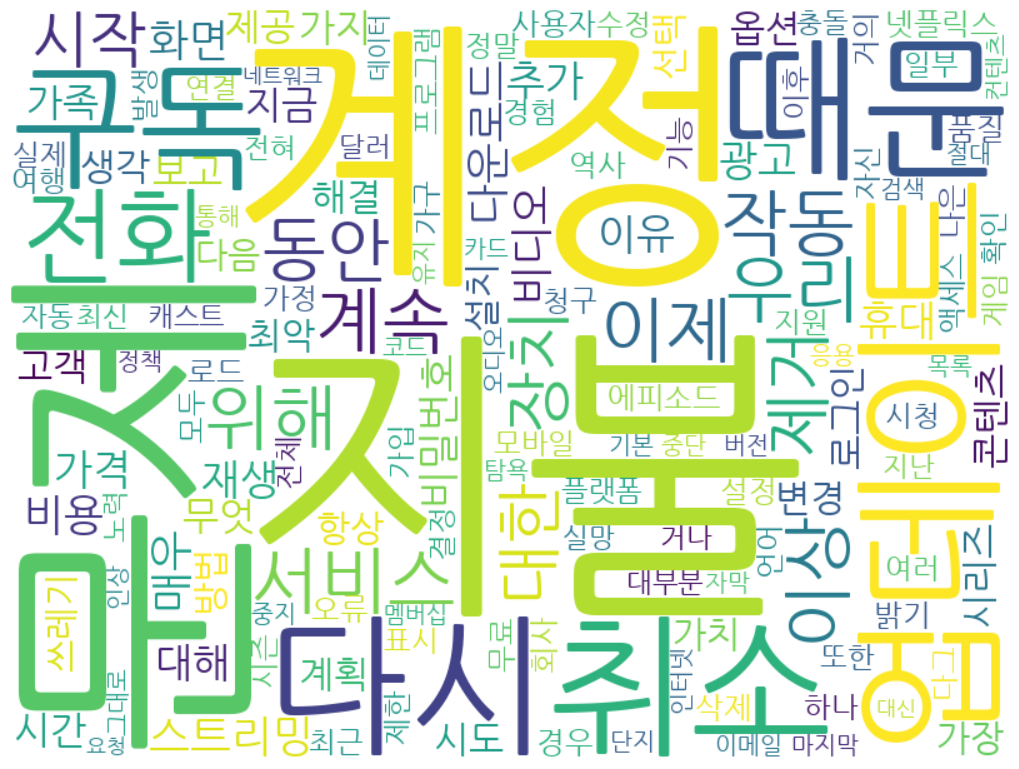

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import nltk
import re

# 필요한 경우 nltk 다운로드
nltk.download('punkt')

# 추출한 전체 텍스트 (예시)
# combined_text = text  # 위 OCR에서 추출한 한글 텍스트

# 1. 한글만 추출
# Read the combined text from the file
with open('combined_text.txt', 'r', encoding='utf-8') as f:
    combined_text = f.read()

cleaned_text = re.sub(r'[^가-힣\s]', '', combined_text)

# 2. 형태소 분석기 사용해 명사 추출
okt = Okt()
tokens = okt.nouns(cleaned_text)

# 3. 불용어 제거
korean_stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '를', '으로', '자', '에', '와', '한',
    '하다', '에', '는', '가', '이다', '을', '를', '이', '다', '그', '가', '에', '한', '하다', '것',
    '등', '그리고', '나', '아니', '있다', '없다', '이다', '같다', '때문에', '등', '그', '고', '의','영화','사용','그것','공유','사람','다른','당신','모든']  # 원하시면 확장 가능
filtered_tokens = [token for token in tokens if token not in korean_stopwords and len(token) > 1]

# 4. 단어 빈도 계산
word_counts = Counter(filtered_tokens)

# 5. 가장 자주 등장한 단어 확인
most_common_words = word_counts.most_common(150)
print("Most common words in negative reviews:", most_common_words)

# 6. 워드클라우드 생성
wordcloud_freq = dict(most_common_words)

# 나눔고딕 폰트 경로 (Colab 전용)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=600,
    background_color='white',
    min_font_size=10
).generate_from_frequencies(wordcloud_freq)

# 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Most common words in negative reviews: [("n't", 45928), ('netflix', 44621), ('app', 30778), ("'s", 23433), ('watch', 18952), ('ca', 16222), ('even', 14440), ('...', 11606), ('account', 11591), ("'m", 11063), ('use', 10308), ('shows', 9655), ('phone', 9128), ('movies', 8986), ('pay', 8918), ('like', 8707), ('get', 8688), ('new', 8351), ('time', 7881), ('money', 7821), ('one', 7464), ('subscription', 7204), ('want', 7197), ('good', 7044), ('service', 6991), ('please', 6794), ('tv', 6672), ('still', 6628), ('update', 6419), ('fix', 6091), ('every', 6031), ('streaming', 5910), ('``', 5603), ('movie', 5503), ("''", 5452), ("'ve", 5375), ('watching', 5186), ('paying', 4983), ('show', 4973), ('work', 4954), ('device', 4942), ('household', 4737), ('content', 4686), ('it.', 4666), ('screen', 4626), ('working', 4605), ('password', 4591), ('would', 4588), ('many', 4538), ('people', 4472)]


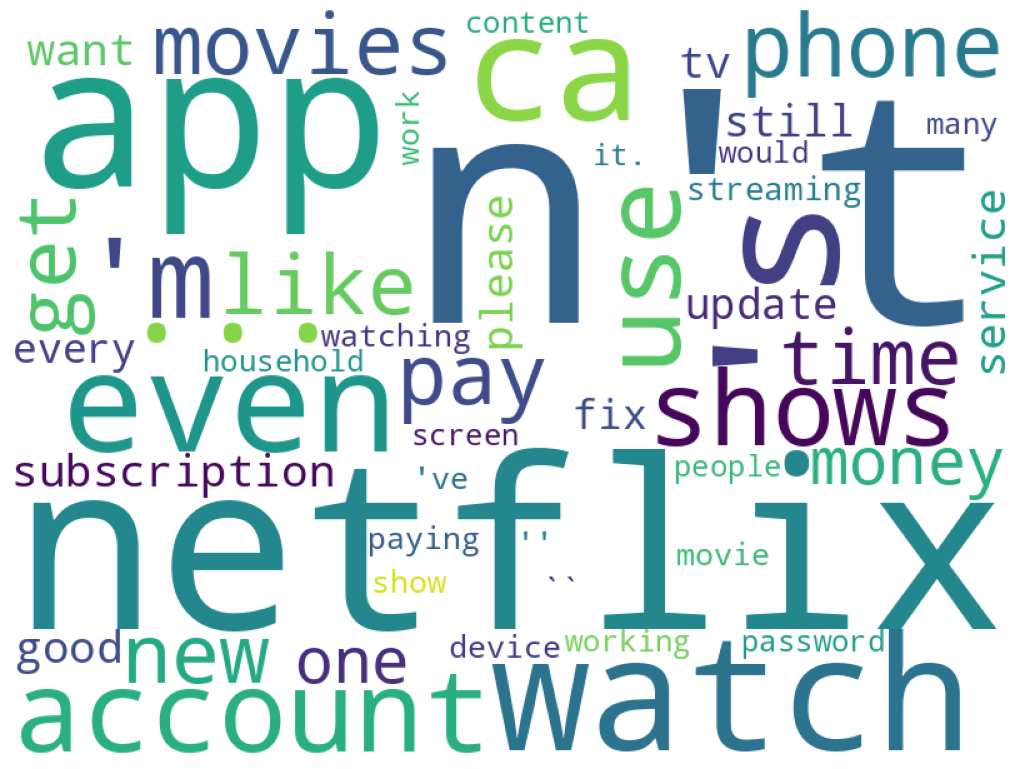

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Use the filtered_tokens generated in the previous step
# filtered_tokens contains tokens from combined_text after removing English stopwords and punctuation

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common words (e.g., top 50)
most_common_words = word_counts.most_common(50) # You can adjust the number here

print("Most common words in negative reviews:", most_common_words)

# Create a dictionary from the most common words for the word cloud
wordcloud_freq = dict(most_common_words)

# Generate word cloud from frequencies
# Adjust width and height as needed
wordcloud = WordCloud(width=800, height=600,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(wordcloud_freq)

# Display the word cloud
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Most common words in negative reviews: [('brightness', 2), ('problems', 1), ('control.', 1), ('turns', 1), ('every', 1), ('time', 1), ('start', 1), ('video', 1), ('setting', 1), ("n't", 1), ('stick', 1), ('keeps', 1), ('resetting', 1), ('highest', 1), ('level', 1)]


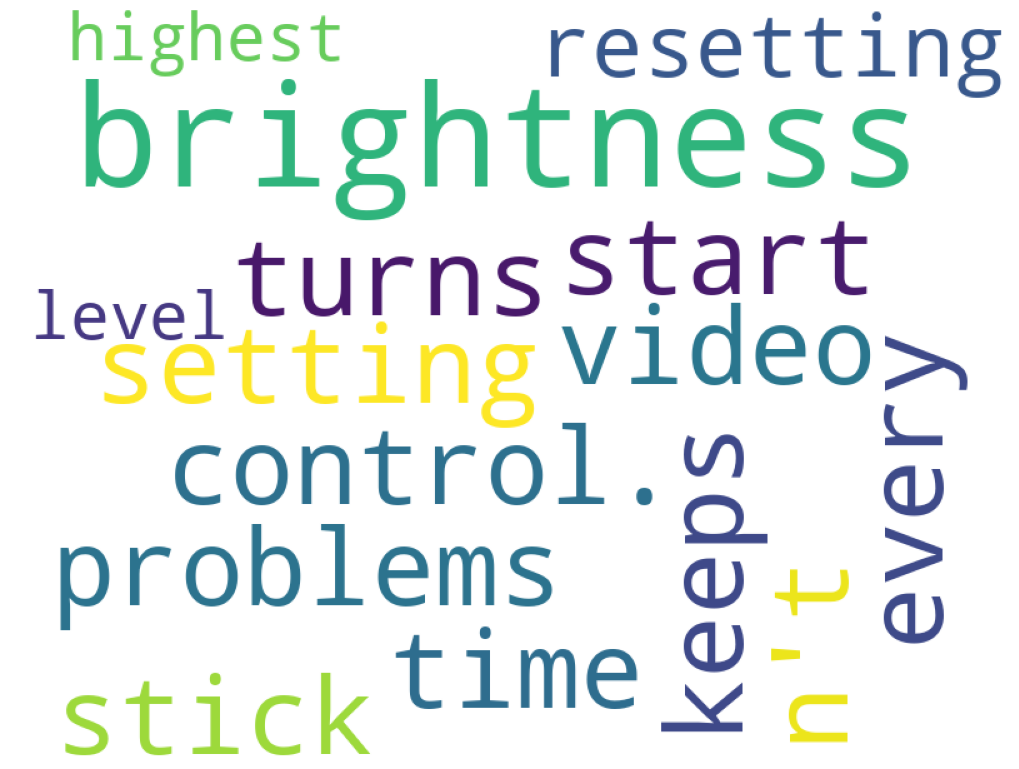

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Use the filtered_tokens generated in the previous step
# filtered_tokens contains tokens from combined_text after removing English stopwords and punctuation

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common words (e.g., top 50)
most_common_words = word_counts.most_common(50) # You can adjust the number here

print("Most common words in negative reviews:", most_common_words)

# Create a dictionary from the most common words for the word cloud
wordcloud_freq = dict(most_common_words)

# Generate word cloud from frequencies
# Adjust width and height as needed
wordcloud = WordCloud(width=800, height=600,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(wordcloud_freq)

# Display the word cloud
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()